In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/andonians/random-linear-regression')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavindiarunika
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 3.95MB/s]

In [ ]:
data=pd.read_csv("random-linear-regression/test.csv")

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
x=data['x']
y=data['y']

In [ ]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


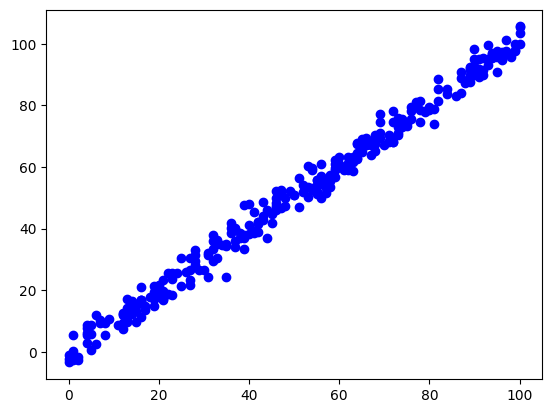

In [ ]:
plt.scatter(x,y,c='b')

In [ ]:
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(240,)

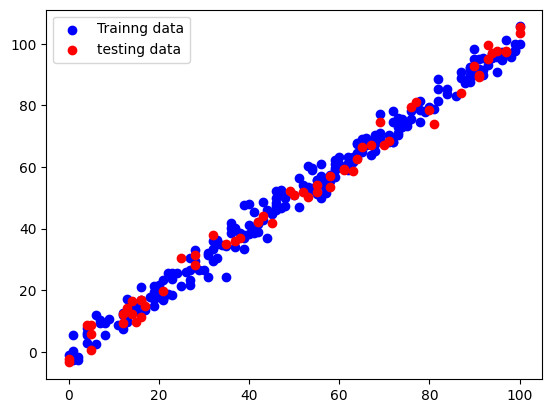

In [ ]:
plt.scatter(x_train,y_train ,c='b' ,label='Trainng data')
plt.scatter(x_test,y_test ,c='r' ,label='testing data')
plt.legend()
plt.show()

model buiding
# New Section

In [ ]:
#create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#complile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

model.fit

<bound method TensorFlowTrainer.fit of <Sequential name=sequential, built=True>>

In [ ]:
#train model
epoch_number=4
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=epoch_number)

Epoch 1/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 51.3073 - mae: 51.3073
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.2749 - mae: 25.2749 
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.8265 - mae: 27.8265  
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.6974 - mae: 26.6974 


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
y_predi=model.predict(x_test)
y_predi[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[221.33536 ],
       [186.91942 ],
       [231.1685  ],
       [ 12.381404],
       [223.79364 ]], dtype=float32)

In [ ]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


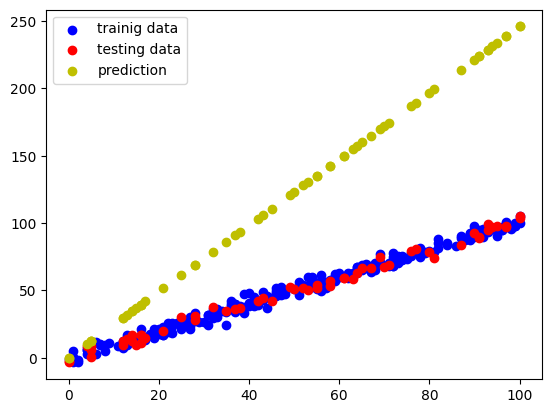

In [ ]:
plt.scatter(x_train,y_train,c='b' ,label='trainig data')
plt.scatter(x_test,y_test ,c='r',label='testing data')
plt.scatter(x_test,y_predi ,c='y',label='prediction')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 72.3107 - mae: 72.3107


[73.00093841552734, 73.00093841552734]

In [ ]:
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_predi))
mae = mae_metric.result().numpy()
print("Mean Absolute Error:", mae)



Mean Absolute Error: 73.000946
